<a href="https://colab.research.google.com/github/tomcat472/geopandas_myanmar/blob/main/geopandas_2023_part02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd

In [ ]:
# Geopandas က vector-based spatial data အားလုံးနီးပါးကို ဖတ်နိုင်ပါတယ်။

# Geopandas Default Datasets များအား ကြည့်ခြင်း

In [ ]:
import os
os.listdir('/usr/local/lib/python3.10/dist-packages/geopandas/datasets/')
# file path ရချင်ရင် gpd.datasets.get_path? ကို run ပြီး help ထဲကနေ copy ယူထည့်ပေးပါ။

['nybb_16a.zip',
 '__init__.py',
 'naturalearth_creation.py',
 'naturalearth_cities',
 '__pycache__',
 'naturalearth_lowres']

In [ ]:
os.listdir('/usr/local/lib/python3.10/dist-packages/geopandas/datasets/naturalearth_cities')

['naturalearth_cities.cpg',
 'naturalearth_cities.README.html',
 'naturalearth_cities.dbf',
 'naturalearth_cities.shp',
 'naturalearth_cities.shx',
 'naturalearth_cities.prj',
 'naturalearth_cities.VERSION.txt']

# geopandas ၏ default dataset များအားသုံးခြင်း:

In [ ]:

world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(3)

<ipython-input-5-68144759a0a0>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


# Data Types များ စစ်ခြင်း

In [ ]:
print(type(world))
print(type(world.continent))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


# CRS Zone များသတ်မှတ်ခြင်း

In [ ]:
# မြန်မာနိုင်ငံအတွက်ဆိုရင် UTM Zone 46/47N ကိုရွေးပေးရမှာဖြစ်ပါတယ်။ global ကျတော့ epsg 4326 ကိုပဲ အသုံးပြုကြပါတယ်။
world.to_crs(epsg=4326)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# crs အားစစ်ခြင်း
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# iloc/ loc အားအသုံးပြုခြင်း

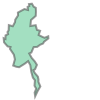

In [ ]:
# loc/iloc နဲ့ index တစ်ခုချင်းဆီကို filer လုပ်ပါက plot နဲ့ထုတ်ပေးပါတယ်။
world.geometry.iloc[93]

In [ ]:
# index အများအပြားကို စစ်ထုတ်ပါက data တွေကိုသာ output ထုတ်ပေးပြီး plot ပြန်လုပ်ပါက ပုံကိုထုတ်ပေးပါတယ်။
world.geometry.iloc[93:100]

93    POLYGON ((100.11599 20.41785, 99.54331 20.1866...
94    POLYGON ((104.33433 10.48654, 105.19991 10.889...
95    MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...
96    POLYGON ((126.17476 37.74969, 126.23734 37.840...
97    POLYGON ((87.75126 49.29720, 88.80557 49.47052...
98    POLYGON ((97.32711 28.26158, 97.40256 27.88254...
99    POLYGON ((92.67272 22.04124, 92.65226 21.32405...
Name: geometry, dtype: geometry

<Axes: >

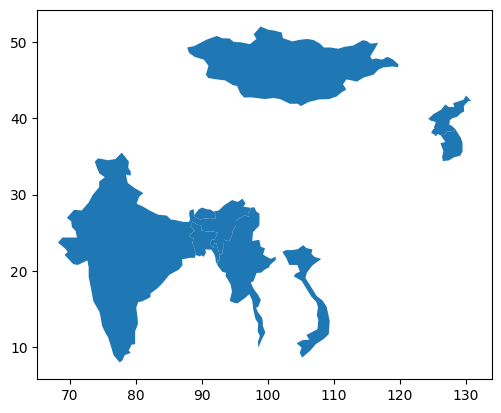

In [ ]:
world.geometry.loc[93:100].plot()

In [ ]:
# loc နဲ့ iloc ဟာ pandas ကအတိုင်းဖြစ်ပါတယ်။ အဲ့တာမို့အကျယ်မရှင်းပြတော့ပါဘူး။

# Google Drive ထဲက vector-based spatial data file များအား အသုံးပြုခြင်း

In [ ]:
# ပထမဆုံးအနေနဲ့ ကိုယ့် colab အကောင့်နဲ့ link ချိတ်ပေးရပါမယ်။
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# google drive ထဲရှိ shp အား ဖတ်ခြင်း
myanmar=gpd.read_file('/content/drive/MyDrive/Shape File/Myanmar Township Boundaries/mmr_polbnda_250k_adm3_mimu.shp')
myanmar.head()

,OBJECTID,ST,ST_PCODE,DT,DT_PCODE,TS,TS_PCODE,SELF_ADMIN,ST_RG,TS_MMR4,geometry
0,313.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Ramree,MMR012013,NaN,State,áááºá¸áá¼á²,"MULTIPOLYGON (((93.99586 18.74753, 93.99853 18..."
1,292.0,Rakhine,MMR012,Thandwe,MMR012D004,Toungup,MMR012016,NaN,State,áá±á¬ááºáá¯ááº,"MULTIPOLYGON (((94.04611 19.02329, 94.04125 19..."
2,314.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Kyaukpyu,MMR012011,NaN,State,áá»á±á¬ááºáá¼á°,"MULTIPOLYGON (((93.83290 19.25509, 93.82447 19..."
3,324.0,Ayeyarwady,MMR017,Labutta,MMR017D004,Labutta,MMR017016,NaN,Region,ááá½áá¹áá¬,"MULTIPOLYGON (((95.06350 15.81486, 95.05964 15..."
4,280.0,Ayeyarwady,MMR017,Pathein,MMR017D001,Ngapudaw,MMR017004,NaN,Region,ááá¯áá±á¬,"MULTIPOLYGON (((94.27572 15.85924, 94.27520 15..."


<Axes: >

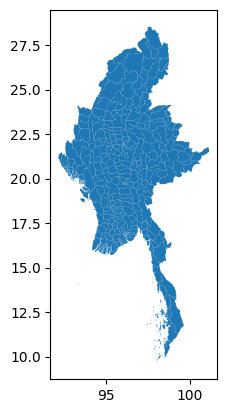

In [ ]:
myanmar.plot()

# file များအား export ထုတ်ခြင်း

In [ ]:
myanmar.columns

Index(['OBJECTID', 'ST', 'ST_PCODE', 'DT', 'DT_PCODE', 'TS', 'TS_PCODE',
       'SELF_ADMIN', 'ST_RG', 'TS_MMR4', 'geometry'],
      dtype='object')

In [ ]:
myanmar[myanmar.ST=='Sagaing'].head(2)

,OBJECTID,ST,ST_PCODE,DT,DT_PCODE,TS,TS_PCODE,SELF_ADMIN,ST_RG,TS_MMR4,geometry
82,227.0,Sagaing,MMR005,Katha,MMR005D004,Tigyaing,MMR005022,NaN,Region,áá®á¸áá»á­á¯ááºá·,"POLYGON ((95.99785 23.90592, 95.99715 23.90714..."
83,122.0,Sagaing,MMR005,Monywa,MMR005D003,Budalin,MMR005013,NaN,Region,áá¯ááááº,"POLYGON ((95.04920 22.24393, 95.04425 22.25014..."


<Axes: >

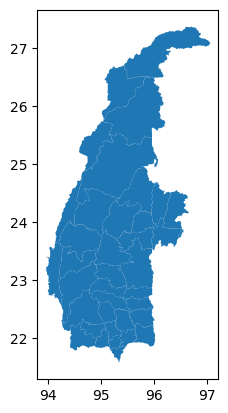

In [ ]:
myanmar[myanmar.ST=='Sagaing'].plot()

In [ ]:
# sagaing division အား shp file အနေဖြင့် export ထုတ်ခြင်း
sagaing=myanmar[myanmar.ST=='Sagaing']
sagaing.to_file('sagaing.shp')
# အဲ့လိုထုတ်လိုက်ရင် ကိုယ့်ရဲ့ drive ထဲကို export ထုတ်သွားမှာဖြစ်ပါတယ်။

In [ ]:
# sagaing division အား geojson file အနေဖြင့် export ထုတ်ခြင်း
sagaing.to_file('sagaing.geojson',driver='GeoJSON')

In [ ]:
# sagaing division အား GeoPackage အနေဖြင့် export ထုတ်ခြင်း
sagaing.to_file('sagaing.gpkg',layer='sagaing',driver='GPKG')